In [1]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


In [2]:
# Load the training and testing datasets
train_path = '/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv'
df_train = pd.read_csv(train_path)

test_path = '/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv'
df_test = pd.read_csv(test_path)


In [3]:
# Select relevant features for C2 detection
features = ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']


In [4]:
# # Impute missing values
# imputer = SimpleImputer(strategy='mean')  # For numerical features
# df_train[features] = imputer.fit_transform(df_train[features])
# df_test[features] = imputer.transform(df_test[features])

# # For categorical features, use the mode
# for feature in features:
#     if df_train[feature].dtype == 'object':
#         mode_imputer = SimpleImputer(strategy='most_frequent')
#         df_train[feature] = mode_imputer.fit_transform(df_train[[feature]])
#         df_test[feature] = mode_imputer.transform(df_test[[feature]])

from sklearn.impute import SimpleImputer

# Separate numerical and categorical features
numerical_features = df_train[features].select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_train[features].select_dtypes(include=['object']).columns

# Impute missing values for numerical features using the mean
numerical_imputer = SimpleImputer(strategy='mean')
df_train[numerical_features] = numerical_imputer.fit_transform(df_train[numerical_features])
df_test[numerical_features] = numerical_imputer.transform(df_test[numerical_features])

# Impute missing values for categorical features using the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_features] = categorical_imputer.fit_transform(df_train[categorical_features])
df_test[categorical_features] = categorical_imputer.transform(df_test[categorical_features])



In [5]:
# Prepare feature sets with one-hot encoding
X_train = pd.get_dummies(df_train[features], drop_first=True)
X_test = pd.get_dummies(df_test[features], drop_first=True)

# Align columns of training and testing data
X_train, X_test = X_train.align(X_test, join='inner', axis=1)


In [6]:
# Label anomalies: '1' for attack, '0' for normal
y_train = df_train['attack_cat'].apply(lambda x: 1 if x != 'Normal' else 0)
y_test = df_test['attack_cat'].apply(lambda x: 1 if x != 'Normal' else 0)


In [7]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Predict anomalies on the test data
y_pred = model.predict(X_test)


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percentage))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 87.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     37000
           1       0.83      0.97      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.86      0.87     82332
weighted avg       0.88      0.87      0.87     82332


Confusion Matrix:
[[28019  8981]
 [ 1492 43840]]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


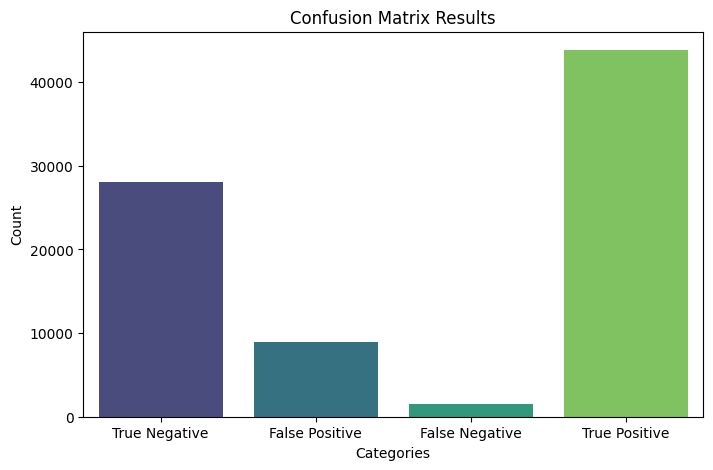

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a bar plot to show the results
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=counts, palette='viridis')
plt.title("Confusion Matrix Results")
plt.ylabel("Count")
plt.xlabel("Categories")
plt.show()
